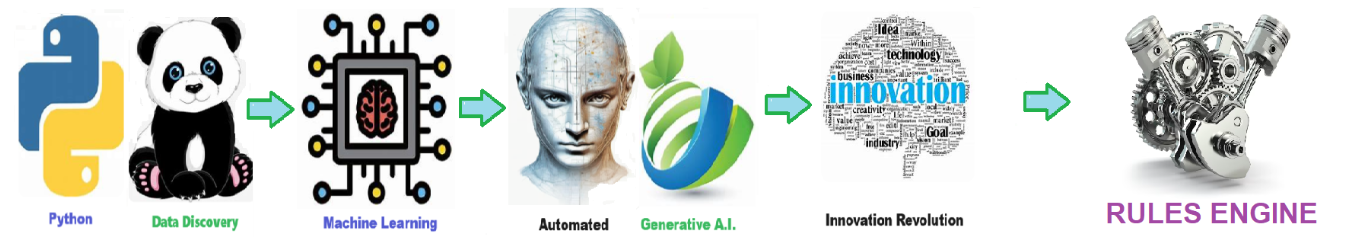

# Data Quality Rules Engine
1. Establish a Data Set repository
    - Meta data about each dat set worthy of quality check 
    - Include Data set type (Table, File, Schema, Directory) 
2. Define Rules
    - A simple set of rules that can be applied to all data sets
3. Assign Rules to data sets 
    - A simple set of rules that can be applied to all data sets    
4. Establish Data Set Quality Reference Measures
    - Permanently establish measures as a "benchmark" 
5. Execuate Data Set Quality Rules
    - Permanently establish measures as a "benchmark"     
6. Test rules individually
7. Test rules as a batch
8. Run dashboard / reporting / alert / escalation  


The **data quality rules engine** is designed to identify and reject datasets of poor quality by rigorously applying predefined validation rules and criteria. 

When data fails to meet standards for completeness, accuracy, integrity, or other quality dimensions, the engine **flags these issues** and rejects the dataset. This ensures that only data meeting quality thresholds is accepted for further use, maintaining the integrity and reliability of the overall system.

The **rules engine** systematically processes data sets to evaluate their overall quality by applying predefined rules and criteria. 

As it iterates through each record, the engine checks for **completeness** by ensuring all required fields are filled, and assesses **structural integrity** by verifying that the data adheres to the expected format and structure. 

It evaluates **referential integrity** by confirming that relationships between different data entities are consistent and valid. 

**Accuracy checks** involve validating the correctness of the data against trusted sources or benchmarks. 

The engine also ensures **timeliness** by checking that the data is current and relevant. 

**Consistency checks** are performed to ensure uniformity across various data sets and systems. 

**Validity rules** confirm that the data meets predefined constraints and standards, while **uniqueness checks** ensure there are no duplicate entries. By systematically applying these rules, the engine provides a comprehensive assessment of the data quality, identifying areas that require correction or improvement.


## Pillars of Data Quality 
 1. **Completeness** - Ensures that all required data is present. 
  2. **Structural Integrity** - Ensures that the data adheres to the defined structure and format. 
  3. **Referential Integrity** - Ensures that data relationships are consistent and valid. 
  4. **Accuracy** - Ensures that data is correct and free from errors. 
  5. **Timeliness** - Ensures that data is up-to-date and available when needed. 
  6. **Consistency** - Ensures that data is uniform and consistent across different datasets and systems. 
  7. **Validity** - Ensures that data conforms to the defined rules and constraints. 
  8. **Uniqueness** - Ensures that each data element is unique and not duplicated. 

In [1]:
first_install = False 
if first_install:
    !pip install schedule
    !pip install zipp

In [2]:
import os, json
import schedule, time
from datetime import datetime
import pandas as pd 
import quick_logger as ql
import talking_code as tc 
import file_manager as fm 
print(f"Libraries Imported succesfully on {datetime.now().date()} at {datetime.now().time()}") 

Libraries Imported succesfully on 2024-05-17 at 17:48:00.354908


## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [3]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  

solution_name = 'rules_engine'

## Optional Step 0 - Intitiate Logging and debugging 

In [4]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(False)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Logging Process.') 

Process rules_engine Step 0 - Initializing and starting Logging Process.


In [14]:
definition = '''
The **data quality rules engine** is designed to identify and reject datasets of poor quality by rigorously applying predefined validation rules and criteria. 

When data fails to meet standards for completeness, accuracy, integrity, or other quality dimensions, the engine **flags these issues** and rejects the dataset. This ensures that only data meeting quality thresholds is accepted for further use, maintaining the integrity and reliability of the overall system.

The **rules engine** systematically processes data sets to evaluate their overall quality by applying predefined rules and criteria. 

As it iterates through each record, the engine checks for **completeness** by ensuring all required fields are filled, and assesses **structural integrity** by verifying that the data adheres to the expected format and structure. 

It evaluates **referential integrity** by confirming that relationships between different data entities are consistent and valid. 

**Accuracy checks** involve validating the correctness of the data against trusted sources or benchmarks. 

The engine also ensures **timeliness** by checking that the data is current and relevant. 

**Consistency checks** are performed to ensure uniformity across various data sets and systems. 

**Validity rules** confirm that the data meets predefined constraints and standards, while **uniqueness checks** ensure there are no duplicate entries. By systematically applying these rules, the engine provides a comprehensive assessment of the data quality, identifying areas that require correction or improvement.

''' 
# Write the solution defitions out to the solution_description.md file
file_name = "solution_description.md"
with open(file_name, 'w') as f:
    # Write the template to the readme.md file
     f.write(definition)

talking_code = False
if talking_code:
    tc.print_say(definition) 
else:
    print(definition)   


The **data quality rules engine** is designed to identify and reject datasets of poor quality by rigorously applying predefined validation rules and criteria. 

When data fails to meet standards for completeness, accuracy, integrity, or other quality dimensions, the engine **flags these issues** and rejects the dataset. This ensures that only data meeting quality thresholds is accepted for further use, maintaining the integrity and reliability of the overall system.

The **rules engine** systematically processes data sets to evaluate their overall quality by applying predefined rules and criteria. 

As it iterates through each record, the engine checks for **completeness** by ensuring all required fields are filled, and assesses **structural integrity** by verifying that the data adheres to the expected format and structure. 

It evaluates **referential integrity** by confirming that relationships between different data entities are consistent and valid. 

**Accuracy checks** involve 

In [6]:
def create_dataframe_list(df, title, term_column_number = 0, definition_column_number = 1):
    mark_down = ""
    if title:
        mark_down += f"## {title} \n"
    for index, row in df.iterrows():
        mark_down += f" {index + 1}. **{row[df.columns[term_column_number]]}** - {row[df.columns[definition_column_number]]} \n "
    return mark_down 

In [7]:

pillars_of_data_quality = {
    "pillars": [
        {"pillar": "Completeness", "description": "Ensures that all required data is present."},
        {"pillar": "Structural Integrity", "description": "Ensures that the data adheres to the defined structure and format."},
        {"pillar": "Referential Integrity", "description": "Ensures that data relationships are consistent and valid."},
        {"pillar": "Accuracy", "description": "Ensures that data is correct and free from errors."},
        {"pillar": "Timeliness", "description": "Ensures that data is up-to-date and available when needed."},
        {"pillar": "Consistency", "description": "Ensures that data is uniform and consistent across different datasets and systems."},
        {"pillar": "Validity", "description": "Ensures that data conforms to the defined rules and constraints."},
        {"pillar": "Uniqueness", "description": "Ensures that each data element is unique and not duplicated."}
    ]
}

# Persist the JSON to a file
with open('pillars_of_data_quality.json', 'w') as file:
    json.dump(pillars_of_data_quality, file, indent=4)


In [9]:
# Load the JSON file into a DataFrame
with open('pillars_of_data_quality.json', 'r') as file:
    data = json.load(file)

df_pillars_of_data_quality = pd.DataFrame(data['pillars'])

md_list = create_dataframe_list(df_pillars_of_data_quality, "Pillars of Data Quality", 0, 1)
file_name = "solution_list.md"
with open(file_name, 'w') as f:
    # Write the template to the readme.md file
     f.write(md_list)
print(md_list) 


## Pillars of Data Quality 
 1. **Completeness** - Ensures that all required data is present. 
  2. **Structural Integrity** - Ensures that the data adheres to the defined structure and format. 
  3. **Referential Integrity** - Ensures that data relationships are consistent and valid. 
  4. **Accuracy** - Ensures that data is correct and free from errors. 
  5. **Timeliness** - Ensures that data is up-to-date and available when needed. 
  6. **Consistency** - Ensures that data is uniform and consistent across different datasets and systems. 
  7. **Validity** - Ensures that data conforms to the defined rules and constraints. 
  8. **Uniqueness** - Ensures that each data element is unique and not duplicated. 
 


In [15]:
data_quality_rules_workflow = {
    "workflow_steps": [
        {"step": 1, "description": "Establish a Data Set repository"},
        {"step": 2, "description": "Add meta data about each data set worthy of quality check"},
        {"step": 3, "description": "Include Data set type (Table, File, Schema, Directory)"},
        {"step": 4, "description": "Define Rules - A simple set of rules that can be applied to all data sets"},
        {"step": 5, "description": "Assign Rules to data sets"},
        {"step": 6, "description": "Establish Data Set Quality Reference Measures"},
        {"step": 8, "description": "Permanently establish measures as a 'benchmark'"},
        {"step": 9, "description": "Execute Data Set Quality Rules"},
        {"step": 10, "description": "Test rules individually and as a batch"},
        {"step": 12, "description": "Run dashboard / reporting / alert / escalation"}
    ]
}

# Persist the JSON to a file
with open('data_quality_rules_workflow.json', 'w') as file:
    json.dump(data_quality_rules_workflow, file, indent=4)


In [17]:
# Load the JSON file into a DataFrame
with open('data_quality_rules_workflow.json', 'r') as file:
    data = json.load(file)

df_data_quality_rules_workflow = pd.DataFrame(data['workflow_steps'])

# Display the DataFrame
df_data_quality_rules_workflow.head()


,step,description
0,1,Establish a Data Set repository
1,2,Meta data about each data set worthy of qualit...
2,3,"Include Data set type (Table, File, Schema, Di..."
3,4,Define Rules
4,5,A simple set of rules that can be applied to a...


## Step 0 - Process End - display log

In [5]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2024-04-26 09:29:30,723 - INFO - START rules_engine =============================================
2024-04-26 09:29:30,723 - INFO - START rules_engine Start Time = 2024-04-26 09:29:30
2024-04-26 09:29:30,723 - INFO - rules_engine Step 0 - Initialize the configuration file parser
2024-04-26 09:29:30,724 - INFO - Process rules_engine Step 0 - Initializing and starting Logging Process.
2024-04-26 09:29:30,736 - INFO - PERFORMANCE rules_engine The total process duration was:0.01
2024-04-26 09:29:30,736 - INFO - PERFORMANCE rules_engine Stop Time = 2024-04-26 09:29:30
2024-04-26 09:29:30,736 - INFO - PERFORMANCE rules_engine Short process duration less than 3 Seconds:0.01
2024-04-26 09:29:30,736 - INFO - PERFORMANCE rules_engine Performance optimization is not reccomended
2024-04-26 09:29:30,736 - INFO - END rules_engine =============================================



## Rules Engine - Automated Data Quality Rules Engine
#### https://github.com/JoeEberle/ -- josepheberle@outlook.comcom